In [20]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids)

10


In [21]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate"],[True, True, True, True, True, True],["bp_prop_clustersize", "margin", "kmeans",1000, 30, 0.01])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)

10


In [22]:
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)

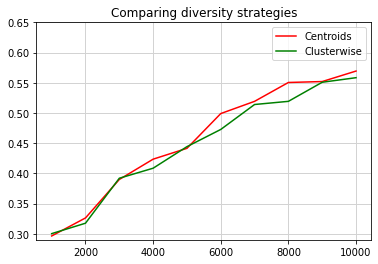

In [26]:
# plot
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='red', label='Centroids')
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='green', label='Clusterwise')
plt.legend()
plt.title(f"Comparing diversity strategies")
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.65])

plt.show()